# Korelasyon (İlişki) Analizi

Değişkenler arasındaki ilişki, bu ilişkinin yönü ve şiddeti ile ilgili bilgler sağlayan istatistiksel bir yöntemdir.

![image.png](imagee45.png)

Burada eğimler değil, korelasyon değerleri verilmiştir. Projelerde mükemmel durumlar genelde rastlanılmazlar. 0.9 - 0.5 arası durumlarda bu ilişkinin dikkate değer olduğunu düşünürüz.  
'İlişki anlamlıdır, ilişkinin yönü pozitif ya da negatiftir, ilişkinin şiddeti şudur.' şeklinde yorumlamalar yapma şansı elde ederiz.

![image.png](imagee46.png)

Örneğin reklam harcamaları arttığında ürün satışlarının da arttığını gözlemlersek burada pozitif korelasyon olduğunu anlayabiliriz.

![image.png](imagee47.png)

![image.png](imagee48.png)

* H0: 'Değişkenler arası korelasyon yoktur.'
* H1: 'Değişkenler arası korelasyon vardır.'  
 anlamlarına gelir.

![image.png](imagee49.png)

Üstteki ifade Pierson Korelasyon katsayısıdır.

Anakitle için korelasyon katsayısı -> 𝜌   
Örneklem için korelasyon katsayısı -> r

### Varsayımlar

![image.png](imagee50.png)

## Business Practice

![image.png](imagee51.png)

Bahşiş veri seti:  
total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)  
tip: bahşiş  
sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)  
smoker: grupta sigara içen var mı? (0=No, 1=Yes)  
day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)  
time: ne zaman? (0=Day, 1=Night)  
size: grupta kaç kişi var?

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [2]:
bill = df['total_bill'] - df['tip']
df = pd.concat([df, bill], axis=1)
df.rename(columns={0: "bill"}, inplace=True)
df

total_bill   tip     sex smoker   day    time  size   bill
0         16.99  1.01  Female     No   Sun  Dinner     2  15.98
1         10.34  1.66    Male     No   Sun  Dinner     3   8.68
2         21.01  3.50    Male     No   Sun  Dinner     3  17.51
3         23.68  3.31    Male     No   Sun  Dinner     2  20.37
4         24.59  3.61  Female     No   Sun  Dinner     4  20.98
..          ...   ...     ...    ...   ...     ...   ...    ...
239       29.03  5.92    Male     No   Sat  Dinner     3  23.11
240       27.18  2.00  Female    Yes   Sat  Dinner     2  25.18
241       22.67  2.00    Male    Yes   Sat  Dinner     2  20.67
242       17.82  1.75    Male     No   Sat  Dinner     2  16.07
243       18.78  3.00  Female     No  Thur  Dinner     2  15.78

[244 rows x 8 columns]

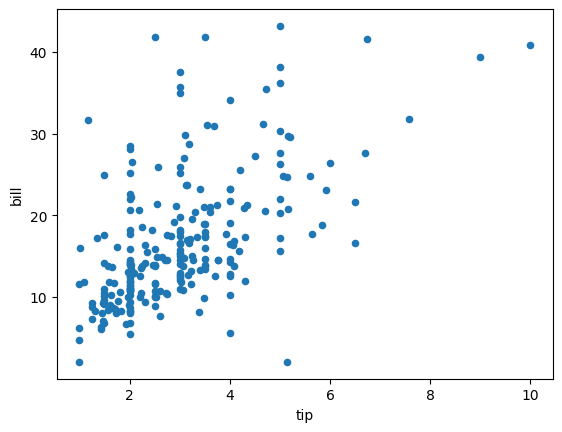

In [3]:
df.plot.scatter("tip", "bill");

In [4]:
# Odenen tutar artikca bahsisin de artigini gormustuk.

## Varsayım Kontrolü

In [5]:
from scipy.stats import shapiro

In [6]:
shapiro(df['tip'])

ShapiroResult(statistic=0.8978110496018736, pvalue=8.200360128656718e-12)

In [7]:
shapiro(df['total_bill'])

ShapiroResult(statistic=0.9197187941346584, pvalue=3.324539186809091e-10)

İki değişken içinde normallik varsayımlarının sağlanmadığını görüyoruz.

### Korelasyon Katsayısı

In [11]:
df['tip'].corr(df['bill']) # Bu yontem varsayimlar saglandiginda uygulanir. Yani bu islem pierson korelasyon katsayisini verir.

0.5766634471096374

In [14]:
df['tip'].corr(df['bill'], method='spearman') # method parametresini ekledigimizde spearman korelasyon katsayisini elde etmis olduk.

0.593691939408997

Burada pozitif yönlü orta şiddetli bir korelasyon olduğunu görüyoruz.

### Korelasyon Anlamlılığının Testi

In [22]:
from scipy.stats import pearsonr
pearsonr(df.tip, df.bill)

PearsonRResult(statistic=0.5766634471096381, pvalue=5.0182900849486195e-23)

Değişkenler arası anlamlı bir ilişki yoktur diyen H0 hipotezini reddediyoruz. Değişkenler arasında anlamlı bir ilişki vardır diyoruz.

## Nonparametrik Korelasyon Testi

Varsayımlar sağlanmadığında spearman veya Kendall Tau testleri kullanılır.

In [27]:
from scipy.stats import spearmanr
test_istatistigi, pvalue = spearmanr(df.tip, df.bill)
print('Korelasyon Katsayisi = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayisi = 0.5937, p-değeri = 0.0000


In [28]:
# Buradaki test istatistigi aslinda korelasyon katsayisidir.

In [29]:
from scipy.stats import kendalltau
test_istatistigi, pvalue = kendalltau(df.tip, df.bill)
print('Korelasyon Katsayisi = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayisi = 0.4401, p-değeri = 0.0000


Kendall testinde korelasyon katsayısı biraz daha düşük çıktı. Yani daha temkinli bir korelasyon değerine sahip diyebiliriz.  
Değişkenler arası anlamlı bir ilişki yoktur diyen H0 hipotezini reddediyoruz. Değişkenler arasında anlamlı bir ilişki vardır diyoruz.